In [1]:
import numpy as np
np.set_printoptions(precision=3)

from scipy.spatial import distance

import pandas as pd

from tqdm.notebook import tqdm

from time import sleep
import copy

from matplotlib import cm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", palette="pastel")

In [2]:
from pacote1_raiz import FireFly
from pacote1_raiz import Pop, Abc, Pso, Sa

from tools.functions import *
from tools.plots import plotPercentiles

# Mazars:

In [3]:
from tools.mazars import Mazars
md = Mazars(trac=True)
fun = md.calc

comp = np.array([[0.1, 15], [10**2, 2*10**4]]) 

trac = np.array([[0.07, 10], [10**3, 10**6]])

ranges = trac

# Main:

In [15]:
nPop = 10
nGen = 50
ranges = np.array([[-50, 50]]*10) #cada linha é uma variavel
fun = rastrigin

meta1 = Pso()
meta2 = FireFly()
meta3 = Abc()
meta4 = Sa()

In [16]:
nRep = 100
metas = {'Abc': [Pop(meta3, fun, ranges, int(nPop/2), nGen) for r in range(nRep)],
         'Pso': [Pop(meta1, fun, ranges, nPop, nGen) for r in range(nRep)],
         'FA': [Pop(meta2, fun, ranges, nPop, nGen) for r in range(nRep)],
         'Sa': [Pop(meta4, fun, ranges, nPop, nGen) for r in range(nRep)]
       }

for k, reps in tqdm(metas.items()):
    for r in tqdm(reps, leave=False):
        for g in range(1, nGen):
            next(r)

In [17]:
mean = {k: np.concatenate([np.array([rep.pBest['ch'][-1, :] for rep in v]).mean(0), 
                   np.vstack([rep.pBest['value'][-1] for rep in v]).min(0)])
  for k, v in metas.items()}
mean = pd.DataFrame(mean).T
#mean.columns = ['A', 'B', 'Val']
mean

,0,1,2,3,4,5,6,7,8,9,10
Abc,-0.203188,1.037824,0.204090,-0.741232,0.017344,0.075648,-0.576259,0.320673,-0.395945,-0.096228,25.642902
Pso,-0.035963,-0.605417,0.095327,0.072552,-0.287912,0.096519,1.478531,1.054262,0.312074,1.266513,257.002253
FA,0.780248,-0.885874,0.536768,0.185734,-0.096057,-0.431166,0.647002,0.610097,-0.027476,0.306987,221.601383
Sa,-1.085684,-1.399806,0.658181,0.861271,2.297308,-1.293245,2.099721,-1.320040,1.864446,0.113650,1566.142236


## Plots

In [18]:
def plotPercentiles(x, data, ax, cmap=plt.cm.Blues, n=21):
    
    percentiles = np.linspace(0,100,n)
    limits = [np.percentile(data, per, 0) for per in percentiles]

    c= cmap(0.5)
    ax.plot(x, data.mean(0), '--', c=c)
    ax.plot(x, np.percentile(data, 0, 0), '--', c=c)
    #ax.plot(x, np.percentile(data, 25, 0), '--', c=c)
    #ax.plot(x, np.percentile(data, 50, 0), '--', c=c)
    #ax.plot(x, np.percentile(data, 75, 0), '--', c=c)
    ax.plot(x, np.percentile(data, 100, 0), '--', c=c)
    
    ax.plot(x, np.percentile(data, 90, 0), '--', c=c)
    
    half = int((n-1)/2)
    for i in range(half):
        ax.fill_between(x, limits[i], limits[-(i+1)], color=cmap(i/half), alpha=0.5)

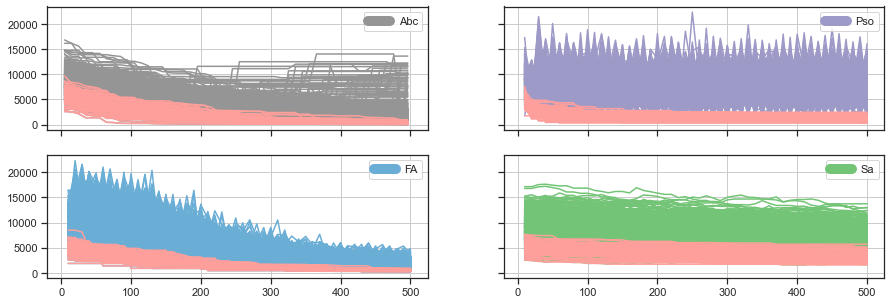

In [19]:
colormaps=iter(['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

fig, (axs) = plt.subplots(2,2,figsize=(15, 5), sharex = True, sharey=True)
for (k, v), ax in zip(metas.items(), axs.flat):
    
    c=cm.get_cmap(next(colormaps))
    
    x = np.cumsum(np.vstack([rep.nfc for rep in v]).mean(0))
  #  x = np.arange(nGen)

    yBest = np.vstack([rep.pBest['value'] for rep in v])
    yPop = np.vstack([[p['value'] for p in rep.pList] for rep in v])

    ax.plot(x, yPop.T, c=c(0.5))
    ax.plot(x, yBest.T, c='r')
    
   # ax.plot(x, yBest.min(0), c='r')
   # ax.plot(x, yPop.min(0), c='pink')
    
    #plotPercentiles(x, yBest, ax, cmap=c)
    #plotPercentiles(x, yPop, ax, cmap=c)
    
    
    ax.plot([],[], label=k, lw=10, c=c(0.5))
    
    ax.legend(ncol=len(metas))
    #ax.set_xlim(0, 3000)
    #ax.set_xlabel('NUMERO DE AVALIAÇÕES')
   # ax.set_ylabel('VALOR DA FUNÇÃO OBJETIVO: {}'.format(fun.__name__))
    ax.grid(True)
#fig.savefig('joao.jpeg', dpi=500)

In [20]:
for k, v in metas.items():
    bestRep = min(v, key=lambda m: m.pBest['value'][-1])
    
    print('%s:' %k)
    print(bestRep.pBest['ch'][-1])
    print(bestRep.pBest['value'][-1])


Abc:
[ 0.015 -1.026  0.135 -0.101  1.029 -0.07  -0.914  1.877  2.029 -2.881]
25.642901925010136
Pso:
[ 0.     2.876 -5.359 -2.134 -2.459  9.951  0.    -5.076  3.268  0.421]
257.00225268553163
FA:
[ 1.231 -2.834 -3.036 -7.618  0.344  2.142 -1.208 -0.978 -4.705 -5.721]
221.60138308242358
Sa:
[16.209 14.471  8.622  1.827 17.874 12.463 10.841  9.506 10.493 -9.399]
1566.1422362748294
